In [1]:
%matplotlib inline

In [109]:
import pandas
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
reload(matplotlib)

<module 'matplotlib' from '/Users/guydavidson/Virtualenvs/dev/lib/python2.7/site-packages/matplotlib/__init__.pyc'>

In [394]:
import quantum_simulation_e91 as e91
reload(e91)

<module 'quantum_simulation_e91' from 'quantum_simulation_e91.py'>

(array([  2.,   4.,   3.,  10.,  14.,  18.,  26.,   7.,  11.,   5.]),
 array([-3.01933016, -2.98804609, -2.95676203, -2.92547796, -2.89419389,
        -2.86290983, -2.83162576, -2.80034169, -2.76905763, -2.73777356,
        -2.7064895 ]),
 <a list of 10 Patch objects>)

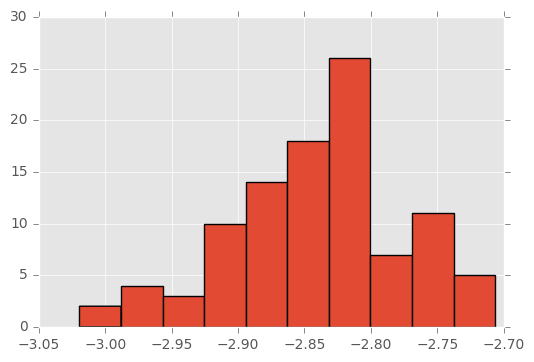

In [284]:
results = [e91.e91() for _ in range(10 ** 2)]
plt.hist(results)

In [315]:
import quantum_simulation_bb84 as bb84
reload(bb84)

<module 'quantum_simulation_bb84' from 'quantum_simulation_bb84.py'>

In [137]:
a = bb84.BB84Agent()
b = bb84.BB84Agent()

qubits = a.send_qubits(10)
#print qubits
#print [a.used_bases[i].interpret(int(a.bits[i])) for i in range(10)]
b.measure(qubits)

b.used_bases[0].basis_vectors[0][]

0.70710678118654746

In [201]:
a.bits == b.bits

array([False,  True,  True,  True,  True,  True,  True, False,  True,  True], dtype=bool)

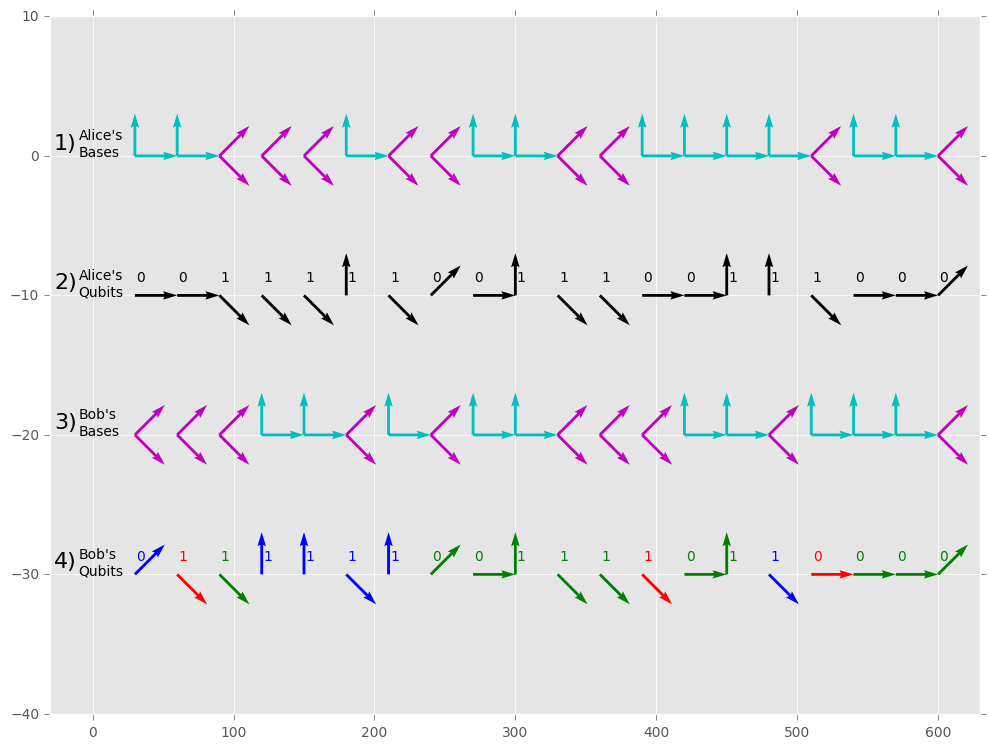

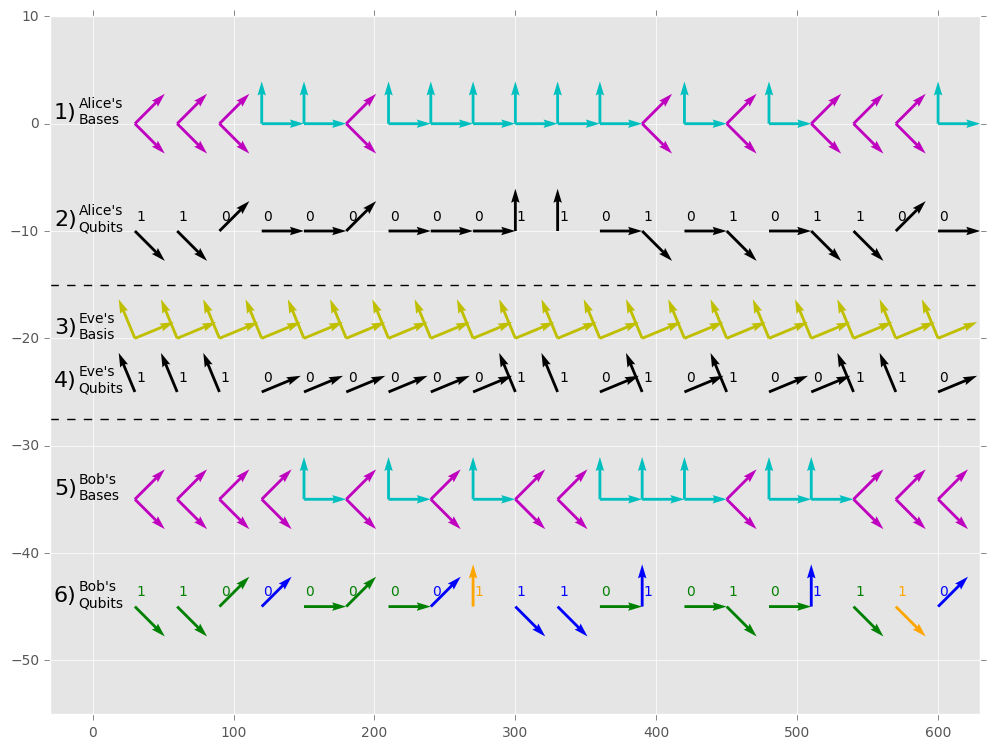

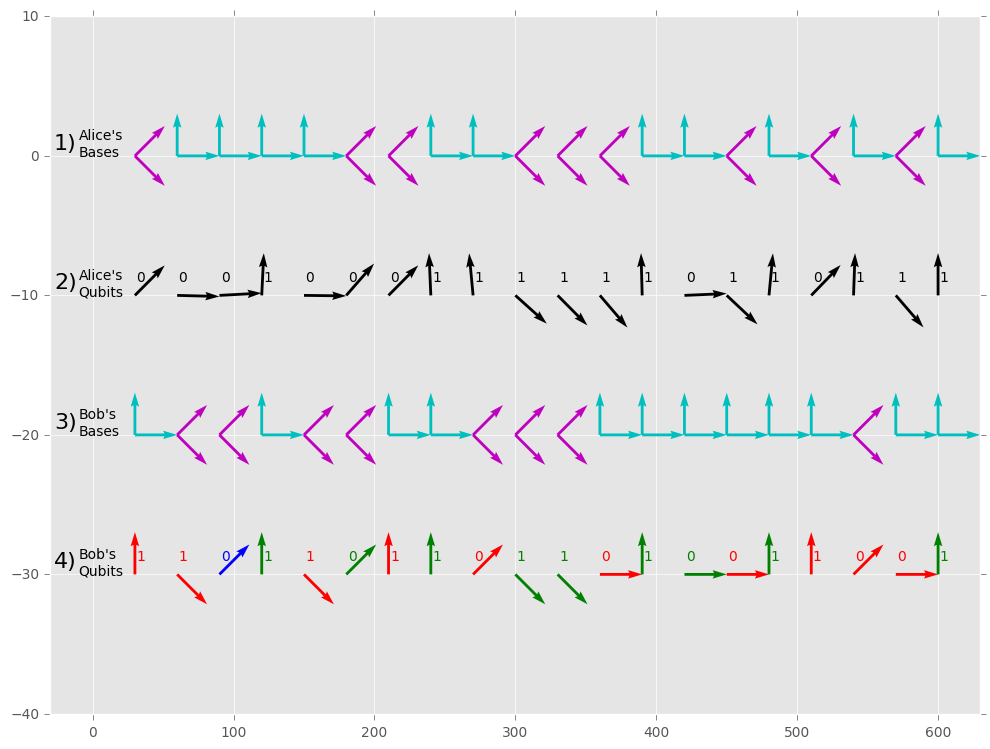

In [362]:
X_PADDING = 30
Y_PADDING = 10
X_STEP = 30
Y_STEP = 10
TEXT_X = -10
NUMBER_X = -27.5
SCALE = 22.0
MINSHAFT = 3


BASIS_COLOR_MAP = {bb84.COMPUTATIONAL_NAME: 'c',
                  bb84.HADAMARD_NAME: 'm',
                  bb84.EVE_NAME: 'y'}

E_91_NAMES = ('0', 'PI / 8', 'PI / 4', '-PI / 8')
E91_COLOR_MAP = plt.get_cmap('Dark2')(np.linspace(0, 1, 12))
BASIS_COLOR_MAP.update({k: v for k, v in zip(E_91_NAMES, E91_COLOR_MAP)})

BB84_QUBIT_COLOR_MAP = {(True, True): 'g', (False, True): 'b', (False, False): 'r', (True, False): 'orange'}
DEFAULT_QUBIT_COLOR = 'black'

def plot_bases_arrows(used_bases, x, height):
    bases_x = x
    bases_y = [Y_STEP * height] * len(bases_x)
    
    if isinstance(used_bases[0].basis_vectors[0], np.matrix):
        bases_u = [(basis.basis_vectors[0][0, 0], basis.basis_vectors[1][0, 0]) for basis in used_bases]
        bases_u = [item for sublist in bases_u for item in sublist]

        bases_v = [(basis.basis_vectors[0][0, 1], basis.basis_vectors[1][0, 1]) for basis in used_bases]
        bases_v = [item for sublist in bases_v for item in sublist]
        
        # Yes, this is ugly:
        colors = [BASIS_COLOR_MAP[basis.name] for basis in used_bases]
        bases_c = []
        for color in colors:
            bases_c.append(color)
            bases_c.append(color)
        
    else:
        bases_u = [(basis.basis_vectors[0][0], basis.basis_vectors[1][0]) for basis in used_bases]
        bases_u = [item for sublist in bases_u for item in sublist]

        bases_v = [(basis.basis_vectors[0][1], basis.basis_vectors[1][1]) for basis in used_bases]
        bases_v = [item for sublist in bases_v for item in sublist]
        
        bases_c = np.repeat([BASIS_COLOR_MAP[basis.name] for basis in used_bases], 2)

    plt.quiver(bases_x, bases_y, bases_u, bases_v, color=bases_c, scale=SCALE, minshaft=MINSHAFT)


def plot_qubit_arrows(qubits, x, height, bits=None, reference_bits=None,
                      bases=None, reference_bases=None,
                      color=DEFAULT_QUBIT_COLOR, color_map=BB84_QUBIT_COLOR_MAP):
    qubits_x = x
    qubits_y = [Y_STEP * height] * len(qubits_x)
    qubits_u, qubits_v = zip(*qubits)
    
    if reference_bits is not None and bases is not None and reference_bases is not None:
        truth_values = zip(np.array(bases) == np.array(reference_bases), bits == reference_bits)
        color = [color_map[result] for result in truth_values]
        
    else:
        color = [color] * len(qubits)
    
    plt.quiver(qubits_x, qubits_y, qubits_u, qubits_v, color=color, scale=SCALE, minshaft=MINSHAFT)
    
    if bits is not None:
        for bit, x, y, c in zip(bits, qubits_x, qubits_y, color):
            xy = x + 1, y + 1
            plt.annotate(str(int(bit)), xy, color=c)


def plot_bb84(n=10, eve=False, noise=bb84.ZERO_NOISE_LAMBDA):
    alice = bb84.BB84Agent(noise=noise)
    bob = bb84.BB84Agent(noise=noise)
    plt.figure(figsize=(12, 9), dpi=1000)
    
    height = 0
    step = 1
    
    x = [i * X_STEP for i in range(1, n + 1)]
    repeated_x = np.repeat(x, 2)
    
    alice_qubits = alice.send_qubits(n)
    
    plot_bases_arrows(alice.used_bases, repeated_x, height)
    plt.annotate(s="Alice's\nBases", xy=(TEXT_X, Y_STEP * height))
    plt.annotate(s="{step})".format(step=step), xy=(NUMBER_X, Y_STEP * height + 0.5), fontsize=16)
    
    height -= 1
    step += 1
    
    plot_qubit_arrows(alice_qubits, x, height, alice.bits)
    plt.annotate(s="Alice's\nQubits", xy=(TEXT_X, Y_STEP * height))
    plt.annotate(s="{step})".format(step=step), xy=(NUMBER_X, Y_STEP * height + 0.5), fontsize=16)
    
    if eve:
        height -= 0.5
        plt.axhline(Y_STEP * height, color='black', ls='--')
        
        eve = bb84.BB84Agent((bb84.EVE_NAME,), noise=noise)
        eve.measure(alice_qubits)
        
        height -= 0.5
        step += 1
        plot_bases_arrows(eve.used_bases, repeated_x, height)
        plt.annotate(s="Eve's\nBasis", xy=(TEXT_X, Y_STEP * height))
        plt.annotate(s="{step})".format(step=step), xy=(NUMBER_X, Y_STEP * height + 0.5), fontsize=16)
        
        height -= 0.5
        step += 1 
        
        original_alice_qubits = alice_qubits
        eve_qubits = [bb84.EVE_BASIS.generate(bit) for bit in eve.bits]
        plot_qubit_arrows(eve_qubits, x, height, eve.bits) 
        plt.annotate(s="Eve's\nQubits", xy=(TEXT_X, Y_STEP * height))
        plt.annotate(s="{step})".format(step=step), xy=(NUMBER_X, Y_STEP * height + 0.5), fontsize=16)
        
        alice_qubits = eve_qubits
        
        height -= 0.25
        plt.axhline(Y_STEP * height, color='black', ls='--')
        
        height -= 0.75
    
    else:
        height -= 1
        
    step += 1
    bob.measure(alice_qubits)

    plot_bases_arrows(bob.used_bases, repeated_x, height)
    plt.annotate(s="Bob's\nBases", xy=(TEXT_X, Y_STEP * height))
    plt.annotate(s="{step})".format(step=step), xy=(NUMBER_X, Y_STEP * height + 0.5), fontsize=16)
    
    height -= 1
    step += 1
    
    bob_qubits = [bob.used_bases[i].interpret(int(bob.bits[i])) for i in range(n)]
    # TODO: consider how to handle this with Eve
    plot_qubit_arrows(bob_qubits, x, height, bob.bits, alice.bits,
                      bob.used_bases, alice.used_bases) 
    plt.annotate(s="Bob's\nQubits", xy=(TEXT_X, Y_STEP * height))
    plt.annotate(s="{step})".format(step=step), xy=(NUMBER_X, Y_STEP * height + 0.5), fontsize=16)
    
    x_min, x_max = plt.xlim()
    plt.xlim(x_min - X_PADDING, x_max + X_PADDING)
    y_min, y_max = plt.ylim()
    plt.ylim(y_min - Y_PADDING, y_max + Y_PADDING)
    plt.show()
    
plot_bb84(20)
plot_bb84(20, True)
plot_bb84(20, noise=bb84.generate_gaussian_noise(sigma=0.05))

In [298]:
alice, bob = e91.generate_alice_bob()
qubits = [e91.QubitPair() for _ in range(10)]
alice.measure_qubits(qubits)
bob.measure_qubits(qubits)

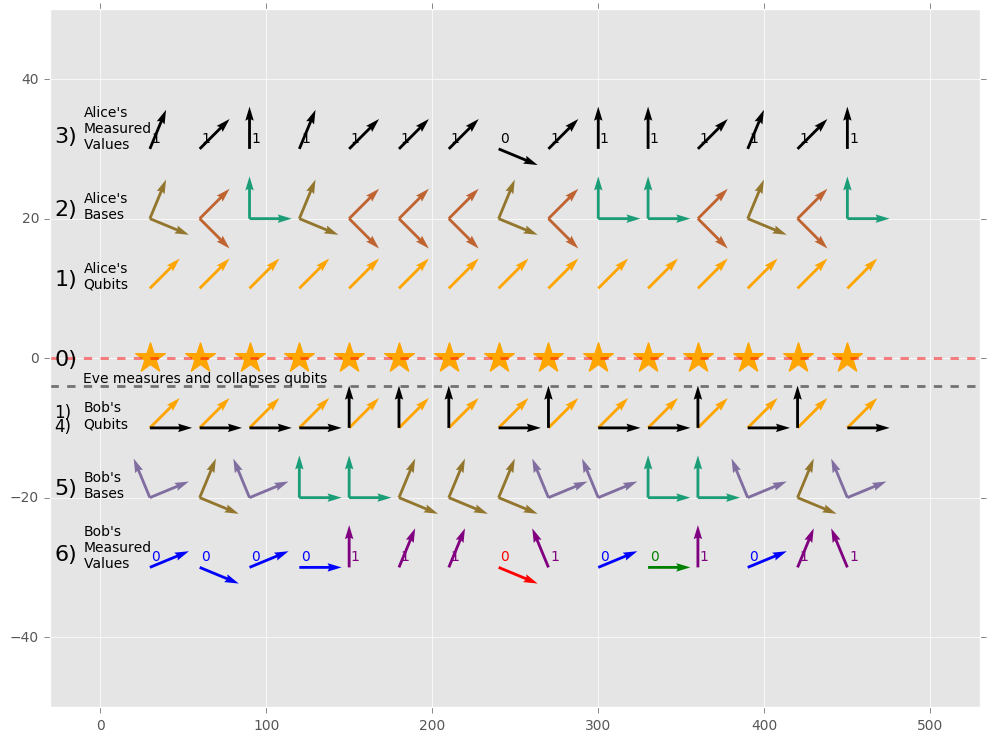

In [395]:
TANGLED_COLOR = 'orange'

E91_QUBIT_COLOR_MAP = {(True, True): 'red', (False, True): 'purple', 
                       (False, False): 'blue', (True, False): 'green'}

def get_qubits_from_bits(agent, flip=False):
    return [np.squeeze(np.asarray(base.interpret(flip ^ bit))) 
            for base, bit in zip(agent.used_bases, agent.bits)]


def plot_e91(n=15, eve_before_alice=False, 
             eve_before_bob=False,
             noise=e91.ZERO_NOISE_LAMBDA):
    alice, bob = e91.generate_alice_bob(noise)
    plt.figure(figsize=(12, 9), dpi=1000)
    
    height = 0
    step = 0
    
    x = [i * X_STEP for i in range(1, n + 1)]
    repeated_x = np.repeat(x, 2)
    
    plt.axhline(linewidth=2, ls='--', color='red', alpha=0.5)
    plt.scatter(x, [0] * len(x), marker='*', s=500, color='orange')
    plt.annotate(s="{step})".format(step=step), xy=(NUMBER_X, Y_STEP * height - 1), fontsize=16)
    
    qubits = [e91.QubitPair(noise=noise) for _ in range(n)]
    
    height += 1
    step += 1
    
    plot_qubit_arrows([np.squeeze(np.asarray(pair.first)) for pair in qubits], 
                      x, height, color=TANGLED_COLOR)
    plot_qubit_arrows([np.squeeze(np.asarray(pair.second)) for pair in qubits], 
                      x, -1 * height, color=TANGLED_COLOR)
    
    plt.annotate(s="Alice's\nQubits", xy=(TEXT_X, Y_STEP * height))
    plt.annotate(s="{step})".format(step=step), xy=(NUMBER_X, Y_STEP * height + 0.5), fontsize=16)
    
    # TODO: introduce eve flag here
    
    # TODO: demonstrate that both are measuring the result of collapse on eve's measurements
    
    # First plot the uncollapsed qubits, measure to collapse, plot the collapsed    
    if eve_before_alice:
        eve_basis = e91.QuantumBasis(e91.COMPUTATIONAL_VECS, '0', noise=noise)
        [qubit.measure(eve_basis) for qubit in qubits]
        
        plot_qubit_arrows([np.squeeze(np.asarray(pair.first)) for pair in qubits], 
                      x, height)
        plot_qubit_arrows([np.squeeze(np.asarray(pair.second)) for pair in qubits], 
                      x, -1 * height)
        
        plt.axhline(y=Y_STEP * height - 4.25, linewidth=2, ls='--', color='black', alpha=0.5)
        plt.annotate(s="Eve measures and collapses qubits", xy=(TEXT_X, Y_STEP * height - 3.5))
        
        alice.measure_qubits(qubits)
        bob.measure_qubits(qubits)
        
    elif eve_before_bob:
        alice.measure_qubits(qubits)
        eve_basis = e91.QuantumBasis(e91.COMPUTATIONAL_VECS, '0', noise=noise)
        [qubit.measure(eve_basis, second=True) for qubit in qubits]
        
        plot_qubit_arrows([np.squeeze(np.asarray(pair.second)) for pair in qubits], 
                      x, -1 * height)
        
        plt.axhline(y=Y_STEP * height * -1 + 6, linewidth=2, ls='--', color='black', alpha=0.5)
        plt.annotate(s="Eve measures and collapses qubits", xy=(TEXT_X, Y_STEP * height * -1 + 6.5))
        
        bob.measure_qubits(qubits)
        
    else:
        alice.measure_qubits(qubits)
        bob.measure_qubits(qubits)
        
        bob_collapsed_values = get_qubits_from_bits(alice, flip=True)
        plot_qubit_arrows(bob_collapsed_values, x, -1 * height)
    
    plt.annotate(s="Bob's\nQubits", xy=(TEXT_X, Y_STEP * height * -1))
    plt.annotate(s="{step})".format(step=step), xy=(NUMBER_X, Y_STEP * height * -1 + 1.5), fontsize=12)
    plt.annotate(s="{step})".format(step=step + 3), xy=(NUMBER_X, Y_STEP * height * -1 - 0.5), fontsize=12)
    
    height +=1 
    step += 1
    
    plot_bases_arrows(alice.used_bases, repeated_x, height)
    plt.annotate(s="Alice's\nBases", xy=(TEXT_X, Y_STEP * height))
    plt.annotate(s="{step})".format(step=step), xy=(NUMBER_X, Y_STEP * height + 0.5), fontsize=16)
    
    plot_bases_arrows(bob.used_bases, repeated_x, -1 * height)
    plt.annotate(s="Bob's\nBases", xy=(TEXT_X, Y_STEP * height * -1))
    plt.annotate(s="{step})".format(step=step + 3), xy=(NUMBER_X, Y_STEP * height * -1 + 0.5), fontsize=16)

    height +=1 
    step += 1
    
    alice_qubits = get_qubits_from_bits(alice)
    bob_qubits = get_qubits_from_bits(bob)

    plot_qubit_arrows(alice_qubits, x, height, bits=np.array(alice.bits, dtype=np.dtype('bool')))
        #, eve and original_alice_qubits or alice_qubits) 
    plt.annotate(s="Alice's\nMeasured\nValues", xy=(TEXT_X, Y_STEP * height))
    plt.annotate(s="{step})".format(step=step), xy=(NUMBER_X, Y_STEP * height + 1), fontsize=16)

    plot_qubit_arrows(bob_qubits, x, height * -1, bits=np.array(bob.bits, dtype=np.dtype('bool')), 
                      reference_bits=np.array(alice.bits, dtype=np.dtype('bool')), 
                      bases=bob.used_bases, reference_bases=alice.used_bases,
                      color_map=E91_QUBIT_COLOR_MAP) 
                      #reference_qubits=bob_collapsed_values, color_map=E91_QUBIT_COLOR_MAP) 
                        #, eve and original_alice_qubits or alice_qubits) 
    plt.annotate(s="Bob's\nMeasured\nValues", xy=(TEXT_X, Y_STEP * height * -1))
    plt.annotate(s="{step})".format(step=step + 3), xy=(NUMBER_X, Y_STEP * height * -1 + 1), fontsize=16)

    x_min, x_max = plt.xlim()
    plt.xlim(x_min - X_PADDING, x_max + X_PADDING)
    y_min, y_max = plt.ylim()
    plt.ylim(y_min - Y_PADDING, y_max + Y_PADDING)
    plt.show()
    
# plot_e91(15)
# plot_e91(15, noise=e91.generate_gaussian_noise(sigma=0.05))
# plot_e91(15, eve_before_alice=True)
plot_e91(15, eve_before_bob=True)

In [162]:
E91_COLOR_MAP

array([[ 0.10588235,  0.61960787,  0.46666667,  1.        ],
       [ 0.60784314,  0.34640523,  0.64836603,  1.        ],
       [ 0.73464053,  0.66405231,  0.04444444,  1.        ],
       [ 0.40000001,  0.40000001,  0.40000001,  1.        ]])

In [280]:
a = np.array((0, 1))
a + np.random.normal(scale=0.05, size=(1,2))

array([[-0.00988071,  0.87505298]])

In [266]:
from functools import partial
p = partial(np.random.normal, 0, 0.05, (1,2))

In [275]:
p = lambda: 0
for _ in range(10):
    v = a + p()
    print v / np.linalg.norm(v), np.linalg.norm(v / np.linalg.norm(v))

[ 1.  0.] 1.0
[ 1.  0.] 1.0
[ 1.  0.] 1.0
[ 1.  0.] 1.0
[ 1.  0.] 1.0
[ 1.  0.] 1.0
[ 1.  0.] 1.0
[ 1.  0.] 1.0
[ 1.  0.] 1.0
[ 1.  0.] 1.0


In [301]:
np.array(alice.used_bases) == np.array(bob.used_bases)

array([ True,  True,  True, False, False, False, False, False, False, False], dtype=bool)

In [299]:
[a == b for a, b in zip(alice.used_bases, bob.used_bases)]

[True, True, True, False, False, False, False, False, False, False]

In [296]:
bob.measure_qubits(qubits)
    

AttributeError: 'numpy.ndarray' object has no attribute 'measure'